In [84]:
import numpy as np
import os
import shutil
import time
import pandas as pd
from os.path import join
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import keras

In [85]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator
from keras.optimizers import SGD
from keras import optimizers

from keras.models import Sequential,Model, load_model

from keras.layers import Input, Activation, Flatten, Dense, Flatten,Conv2D, Dropout, MaxPool2D, GlobalAveragePooling2D


from keras.callbacks.callbacks import ModelCheckpoint,EarlyStopping

from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Load EDS Dataset

In [91]:
X = np.load('X_Dataset2.npy')
Y = np.load('Y_Dataset2.npy')

In [92]:
X_EDS_train,X_EDS_test,Y_EDS_train,Y_EDS_test=train_test_split(X,Y,test_size=0.25,random_state=53)

### Define CNN model

In [93]:
def vgg16_mod_3(lr = 0.00001):
    model=Sequential()
    
    model.add(Conv2D(input_shape=(112,112,9),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=1, activation="linear"))
    
    
    sgd = optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(optimizer=sgd,loss="mean_absolute_percentage_error")
    return model

### Train Model

In [94]:
model_lr_7 = vgg16_mod_3(lr=1e-7)

In [95]:
checkpoint = ModelCheckpoint("vgg16_eds_10312021_lr_7.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')

In [96]:
eds_history_10312021_lr_7 = model_lr_7.fit(X_EDS_train,Y_EDS_train,validation_data=(X_EDS_test,Y_EDS_test),epochs=300, batch_size=16,callbacks=[checkpoint,early])

Train on 600 samples, validate on 200 samples
Epoch 1/300
600/600 [==============================] - 57s 94ms/step - loss: 100.4301 - val_loss: 100.0274

Epoch 00001: val_loss improved from inf to 100.02737, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 2/300
600/600 [==============================] - 54s 89ms/step - loss: 99.6555 - val_loss: 99.2949

Epoch 00002: val_loss improved from 100.02737 to 99.29492, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 3/300
600/600 [==============================] - 56s 93ms/step - loss: 98.9702 - val_loss: 98.6784

Epoch 00003: val_loss improved from 99.29492 to 98.67837, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 4/300
600/600 [==============================] - 54s 91ms/step - loss: 98.4052 - val_loss: 98.2039

Epoch 00004: val_loss improved from 98.67837 to 98.20388, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 5/300
600/600 [==============================] - 53s 88ms/step - loss: 97.9757 - val_loss: 97.8299

Epoch 00005: val_loss

Epoch 42/300
600/600 [==============================] - 54s 90ms/step - loss: 10.6716 - val_loss: 11.2228

Epoch 00042: val_loss did not improve from 11.13953
Epoch 43/300
600/600 [==============================] - 52s 87ms/step - loss: 10.6658 - val_loss: 11.0950

Epoch 00043: val_loss improved from 11.13953 to 11.09502, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 44/300
600/600 [==============================] - 55s 91ms/step - loss: 10.6342 - val_loss: 11.0624

Epoch 00044: val_loss improved from 11.09502 to 11.06243, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 45/300
600/600 [==============================] - 55s 91ms/step - loss: 10.6024 - val_loss: 11.0928

Epoch 00045: val_loss did not improve from 11.06243
Epoch 46/300
600/600 [==============================] - 55s 91ms/step - loss: 10.6077 - val_loss: 10.9888

Epoch 00046: val_loss improved from 11.06243 to 10.98881, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 47/300
600/600 [==============================] - 53

Epoch 87/300
600/600 [==============================] - 65s 108ms/step - loss: 9.8179 - val_loss: 10.4358

Epoch 00087: val_loss improved from 10.46514 to 10.43577, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 88/300
600/600 [==============================] - 55s 91ms/step - loss: 9.7877 - val_loss: 10.4204

Epoch 00088: val_loss improved from 10.43577 to 10.42045, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 89/300
600/600 [==============================] - 54s 90ms/step - loss: 9.8338 - val_loss: 10.4281

Epoch 00089: val_loss did not improve from 10.42045
Epoch 90/300
600/600 [==============================] - 55s 91ms/step - loss: 9.7577 - val_loss: 10.4226

Epoch 00090: val_loss did not improve from 10.42045
Epoch 91/300
600/600 [==============================] - 54s 90ms/step - loss: 9.7617 - val_loss: 10.3935

Epoch 00091: val_loss improved from 10.42045 to 10.39350, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 92/300
600/600 [==============================] - 56s 94

600/600 [==============================] - 54s 90ms/step - loss: 9.2526 - val_loss: 9.9503

Epoch 00132: val_loss did not improve from 9.91703
Epoch 133/300
600/600 [==============================] - 54s 89ms/step - loss: 9.2509 - val_loss: 9.8992

Epoch 00133: val_loss improved from 9.91703 to 9.89916, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 134/300
600/600 [==============================] - 53s 88ms/step - loss: 9.2430 - val_loss: 9.8887

Epoch 00134: val_loss improved from 9.89916 to 9.88869, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 135/300
600/600 [==============================] - 54s 89ms/step - loss: 9.2545 - val_loss: 9.9289

Epoch 00135: val_loss did not improve from 9.88869
Epoch 136/300
600/600 [==============================] - 54s 89ms/step - loss: 9.2215 - val_loss: 9.8745

Epoch 00136: val_loss improved from 9.88869 to 9.87450, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 137/300
600/600 [==============================] - 54s 91ms/step - loss: 9.2062

600/600 [==============================] - 55s 91ms/step - loss: 8.9740 - val_loss: 9.5805

Epoch 00179: val_loss did not improve from 9.57475
Epoch 180/300
600/600 [==============================] - 54s 90ms/step - loss: 8.9416 - val_loss: 9.5636

Epoch 00180: val_loss improved from 9.57475 to 9.56356, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 181/300
600/600 [==============================] - 54s 90ms/step - loss: 8.9570 - val_loss: 9.6700

Epoch 00181: val_loss did not improve from 9.56356
Epoch 182/300
600/600 [==============================] - 54s 91ms/step - loss: 8.9189 - val_loss: 9.5489

Epoch 00182: val_loss improved from 9.56356 to 9.54890, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 183/300
600/600 [==============================] - 53s 88ms/step - loss: 8.9427 - val_loss: 9.5576

Epoch 00183: val_loss did not improve from 9.54890
Epoch 184/300
600/600 [==============================] - 54s 90ms/step - loss: 8.9327 - val_loss: 9.5444

Epoch 00184: val_loss impro

600/600 [==============================] - 54s 89ms/step - loss: 8.7700 - val_loss: 9.4333

Epoch 00227: val_loss did not improve from 9.37881
Epoch 228/300
600/600 [==============================] - 54s 89ms/step - loss: 8.7507 - val_loss: 9.4576

Epoch 00228: val_loss did not improve from 9.37881
Epoch 229/300
600/600 [==============================] - 55s 91ms/step - loss: 8.7651 - val_loss: 9.4076

Epoch 00229: val_loss did not improve from 9.37881
Epoch 230/300
600/600 [==============================] - 53s 89ms/step - loss: 8.7336 - val_loss: 9.3326

Epoch 00230: val_loss improved from 9.37881 to 9.33264, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 231/300
600/600 [==============================] - 54s 90ms/step - loss: 8.7793 - val_loss: 9.3704

Epoch 00231: val_loss did not improve from 9.33264
Epoch 232/300
600/600 [==============================] - 53s 88ms/step - loss: 8.7464 - val_loss: 9.4749

Epoch 00232: val_loss did not improve from 9.33264
Epoch 233/300
600/600 [=

600/600 [==============================] - 54s 90ms/step - loss: 8.5947 - val_loss: 9.3199

Epoch 00277: val_loss did not improve from 9.19530
Epoch 278/300
600/600 [==============================] - 54s 90ms/step - loss: 8.6038 - val_loss: 9.2565

Epoch 00278: val_loss did not improve from 9.19530
Epoch 279/300
600/600 [==============================] - 52s 87ms/step - loss: 8.5815 - val_loss: 9.1859

Epoch 00279: val_loss improved from 9.19530 to 9.18587, saving model to vgg16_eds_10312021_lr_7.h5
Epoch 280/300
600/600 [==============================] - 54s 90ms/step - loss: 8.6019 - val_loss: 9.1960

Epoch 00280: val_loss did not improve from 9.18587
Epoch 281/300
600/600 [==============================] - 55s 92ms/step - loss: 8.5916 - val_loss: 9.2522

Epoch 00281: val_loss did not improve from 9.18587
Epoch 282/300
600/600 [==============================] - 54s 90ms/step - loss: 8.5775 - val_loss: 9.2523

Epoch 00282: val_loss did not improve from 9.18587
Epoch 283/300
600/600 [=

In [97]:
model_lr_7.save("vgg16_modelfile_10312021_10sample_epo200_batch16_2.h5")
model_lr_7.save_weights('vgg16_weightsfile_10312021_10sample_epo200_batch16_2.h5')

In [98]:
eds_history_10312021_df = pd.DataFrame(eds_history_10312021_lr_7.history) 
eds_history_10312021_df.to_excel('saved_training_histroy_10312021.xlsx')

### Predict

In [99]:
pred_10312021 = model_lr_7.predict(X_EDS_test)

Text(0.5, 0, "Ground truth Young's modulus \nfrom indenation experiments, GPa")

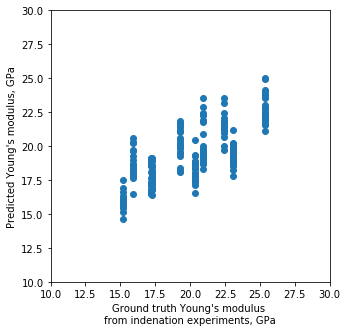

In [100]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(Y_EDS_test,pred_10312021)
ax.set_xlim([10,30])
ax.set_ylim([10,30])
ax.set_ylabel("Predicted Young's modulus, GPa")
ax.set_xlabel("Ground truth Young's modulus \nfrom indenation experiments, GPa")